<a href="https://colab.research.google.com/github/yusuffenes/GlobalAIHub_VeriAnalizi/blob/main/HR_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bu projede, çalışan memnuniyeti ve performans verilerini kullanarak çalışanların işten ayrılma olasılığını tahmin edeceğiz. Bu amaca ulaşmak için çeşitli veri analizi, görselleştirme teknikleri ve makine öğrenimi modelleri kullanacağız.



# GEREKLİ KÜTÜPHANELERİ EKLİYORUZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # Hata mesajlarını gizlemek için kullanıyoruz.

### Veri Yükleme ve İlk İnceleme
### Veri setini df değişkenine yükleyip, kopyasını oluşturuyoruz. Daha sonra ilk beş satırı inceleyerek verinin genel yapısını anlıyoruz:



In [3]:
hr_df = pd.read_csv('HR_capstone_dataset.csv')
df = hr_df.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


info komutu ile verisetini inceliyoruz buradan kategorik verilr ile numerik değerleri görebiliriz.

### Veri Seti İncelemesi


Veri setinin genel yapısını anlamak için info komutunu kullanıyoruz. Bu sayede veri türlerini ve eksik değerleri görebiliriz.




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2 adet kategorik değer bulunuyor ve hiç null değerimiz bulunmuyor.

Numerik sütunların tanımlayıcı istatistiklerini inceleyelim:



In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.describe(include='object')

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


Eksik değerleri kontrol edelim:



In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Veri setinde eksik değer bulunmamaktadır.

Yinelenen satırları kontrol edelim ve gerekirse silelim:

In [8]:
df.duplicated().sum()

3008

In [9]:
df.drop_duplicates(inplace=True)

Yinelenen satırları kaldırdıktan sonra veri setimizin boyutları şu şekildedir:



In [75]:
df.shape

(11991, 10)

# Veri Görselleştirme
## Kategorik Değişkenlerin Dağılımı
### Kategorik değişkenlerin dağılımını inceleyelim:

In [10]:
for col in df.columns:
  if df[col].dtype == 'object':
      px.histogram(df, x=col).show()

## Numerik Değişkenlerin Kutu Grafikleri (Box Plot)


In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    px.box(df[col]).show()


## Numerik Değişkenlerin Histogramları

In [74]:
for col in df.columns:
  if df[col].dtype != 'object':
    px.histogram(df, x=col,title=f'{col} Histogram').show()

## Alan Grafiği
### Satisfaction level ve average montly hours arasındaki ilişkiyi gösteren alan grafiği:



In [23]:
px.area(df, x='satisfaction_level', y='average_montly_hours', color='left')

### Kategorik Değişkenlerin Etiketlenmesi (Label Encoding)


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Korelasyon Matrisi
### Değişkenler arasındaki korelasyonları incelemek için bir korelasyon matrisi oluşturuyoruz.



In [77]:
df.corr().style.background_gradient()

# corr_matrix = df.corr()
# plt.figure(figsize=(10,6))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
Department,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


In [78]:
df.corr()['left'].sort_values(ascending=False,key=abs)

left                     1.000000
satisfaction_level      -0.350558
time_spend_company       0.173295
Work_accident           -0.125436
average_montly_hours     0.070409
promotion_last_5years   -0.044657
number_project           0.030928
Department               0.018286
last_evaluation          0.013520
salary                   0.004224
Name: left, dtype: float64

# Makine Öğrenimi Modeli
### Veriyi Eğitim ve Test Setlerine Ayırma

In [79]:
from sklearn.model_selection import train_test_split

X= df.drop('left', axis=1)
y= df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

In [80]:
pip install lazypredict

In [81]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:18<00:00,  2.79it/s]

[LightGBM] [Info] Number of positive: 1683, number of negative: 8509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 10192, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165130 -> initscore=-1.620547
[LightGBM] [Info] Start training from score -1.620547


100%|██████████| 29/29 [00:19<00:00,  1.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.97,0.97,0.99,0.31
RandomForestClassifier,0.99,0.96,0.96,0.99,1.09
XGBClassifier,0.98,0.96,0.96,0.98,0.22
BaggingClassifier,0.98,0.96,0.96,0.98,0.24
ExtraTreesClassifier,0.98,0.95,0.95,0.98,0.65
DecisionTreeClassifier,0.97,0.95,0.95,0.97,0.07
SVC,0.97,0.94,0.94,0.97,1.20
LabelSpreading,0.96,0.94,0.94,0.96,7.15
LabelPropagation,0.96,0.94,0.94,0.96,3.19


In [82]:
models_sort=models.sort_values(by="Accuracy",ascending=True)
fig=px.bar(models_sort, x='Accuracy', y=models_sort.index, orientation='h', title='Model Accuracy Comparison',color='Accuracy', color_continuous_scale='Oryel',height=950)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [83]:
px.bar(models_sort, x='Time Taken', y=models_sort.index, orientation='h', title='Model Time Taken Comparison',color='Time Taken',color_continuous_scale='Oryel')

In [84]:
px.bar(models_sort, x='F1 Score', y=models_sort.index, orientation='h', title='Model F1 Score Comparison',color='F1 Score',color_continuous_scale='Oryel',height=950)
#

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1491
           1       0.99      0.93      0.96       308

    accuracy                           0.99      1799
   macro avg       0.99      0.96      0.98      1799
weighted avg       0.99      0.99      0.99      1799


Cross-Validation Scores: [0.98832847 0.98206839 0.9854045  0.98415346 0.98165138]

 Ortalama :  0.9843212403277567 
 Standart Sapma :  0.002427468169649096 
 



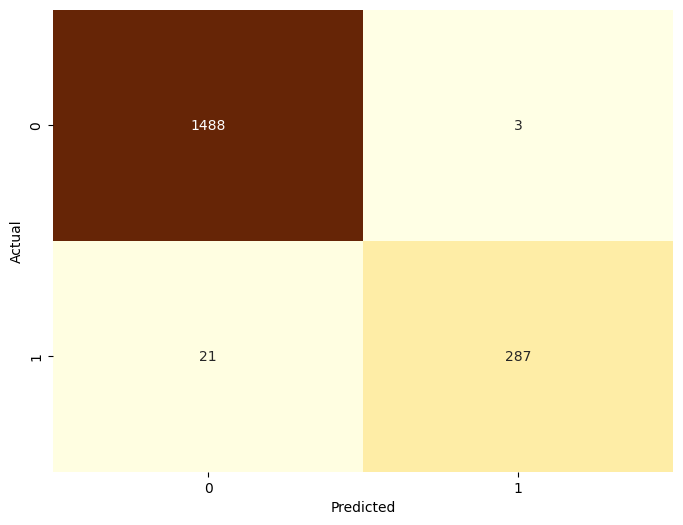

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
cv = cross_val_score(rf_clf, X, y, cv=5)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlOrBr", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('\nCross-Validation Scores:',cv)
print('\n','Ortalama : ',cv.mean(),'\n','Standart Sapma : ',cv.std(),'\n \n')
